In [1]:
import os
from glob import glob
import torch
import torchio as tio

import numpy as np
from PIL import Image

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from mgmt.data.nifti import load_subjects

from mgmt.data.subject_transforms import largest_tumor_crop_bounds, tumor_crop_dimensions
from mgmt.utils.segmentation import find_objects_fixed_crop, make_label_mask

import scipy
from collections import defaultdict
from tqdm import tqdm

In [2]:
subjects = load_subjects("/home/bryan/data/brain_tumor/caidm_3d_240","/home/bryan/data/brain_tumor/classification/train_labels.csv" )

In [3]:
dimension_sizes = defaultdict(list)

In [4]:
for subject in tqdm(subjects[:10]):
    for crop_dim in tumor_crop_dimensions(subject):
        vol = np.prod(crop_dim)
        if vol > 10:
            dimension_sizes["x"].append(crop_dim[0])
            dimension_sizes["y"].append(crop_dim[1])
            dimension_sizes["z"].append(crop_dim[2])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.52it/s]


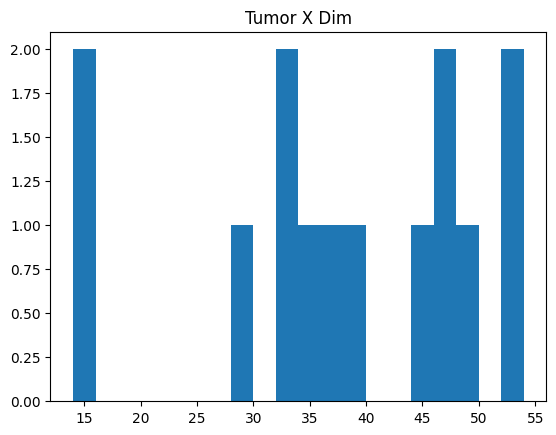

In [6]:
import matplotlib
# %matplotlib tk
# matplotlib.use('TkAgg')
# matplotlib.use("GTK4Agg")
# matplotlib.use("QtAgg")

plt.hist(dimension_sizes["x"], bins=20)
plt.title("Tumor X Dim")
plt.show()

(array([469., 121.,  39.,  23.,  32.,  52.,  36.,  40.,  71.,  68.,  82.,
         98.,  90.,  73.,  66.,  48.,  27.,  19.,   7.,   3.]),
 array([  1. ,   7.7,  14.4,  21.1,  27.8,  34.5,  41.2,  47.9,  54.6,
         61.3,  68. ,  74.7,  81.4,  88.1,  94.8, 101.5, 108.2, 114.9,
        121.6, 128.3, 135. ]),
 <BarContainer object of 20 artists>)

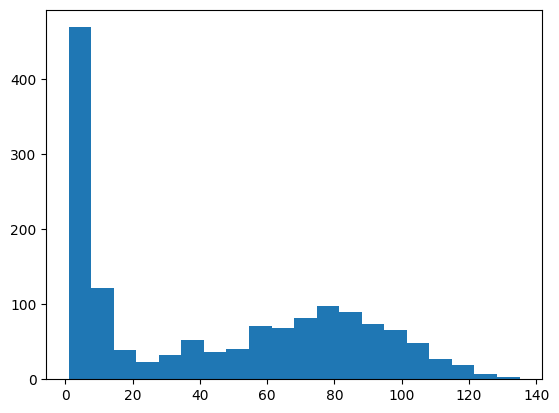

In [73]:
plt.hist(dimension_sizes["y"], bins=20)

(array([466., 107.,  51.,  25.,  25.,  45.,  31.,  50.,  62.,  67.,  55.,
         81., 104.,  94.,  71.,  77.,  33.,  15.,   3.,   2.]),
 array([  1. ,   6.2,  11.4,  16.6,  21.8,  27. ,  32.2,  37.4,  42.6,
         47.8,  53. ,  58.2,  63.4,  68.6,  73.8,  79. ,  84.2,  89.4,
         94.6,  99.8, 105. ]),
 <BarContainer object of 20 artists>)

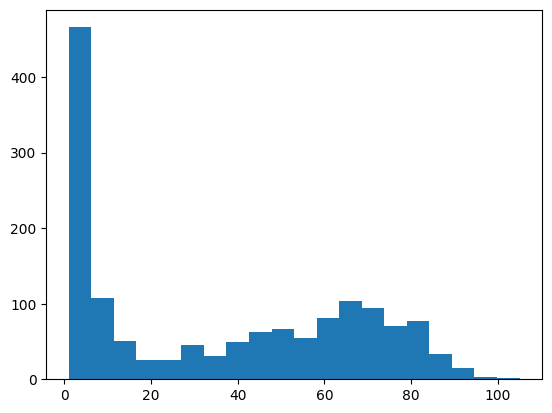

In [74]:
plt.hist(dimension_sizes["z"], bins=20)